In [2]:
import keras
from keras import layers
from keras import models
from keras.datasets import mnist
from keras.utils import to_categorical

### 数据的加载并将其划分为训练数据与测试数据以及归一化

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### 构建卷积神经网络模型

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [5]:
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


### 利用训练数据进行模型的训练

In [6]:
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 36s 39ms/step - loss: 0.8801 - accuracy: 0.7405
Epoch 2/5
938/938 [==============================] - 36s 39ms/step - loss: 0.2198 - accuracy: 0.9337
Epoch 3/5
938/938 [==============================] - 37s 40ms/step - loss: 0.1428 - accuracy: 0.9567
Epoch 4/5
938/938 [==============================] - 38s 41ms/step - loss: 0.1092 - accuracy: 0.9672
Epoch 5/5
938/938 [==============================] - 36s 38ms/step - loss: 0.0923 - accuracy: 0.9715


### 利用测试数据进行模型的测试

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('测试数据准确率',test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0712 - accuracy: 0.9782
测试数据准确率 0.9782000184059143


### 进行数据的可视化处理，加大epoch观察模型在训练与测试数据集上的情况

In [8]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt


checkpoint_save_path = "./checkpoint_2/mnist.ckpt"
if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True)

history = model.fit(train_images,
                      train_labels,
                      batch_size=64,
                      epochs=55,
                      validation_data=(test_images, test_labels),
                      callbacks=[cp_callback])
model.summary()

# print(model.trainable_variables)
file = open('./weights_2.txt', 'w')
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

Epoch 1/55
938/938 [==============================] - 37s 40ms/step - loss: 0.0800 - accuracy: 0.9753 - val_loss: 0.0688 - val_accuracy: 0.9797
Epoch 2/55
938/938 [==============================] - 37s 39ms/step - loss: 0.0710 - accuracy: 0.9779 - val_loss: 0.0601 - val_accuracy: 0.9797
Epoch 3/55
938/938 [==============================] - 38s 41ms/step - loss: 0.0645 - accuracy: 0.9798 - val_loss: 0.0580 - val_accuracy: 0.9807
Epoch 4/55
938/938 [==============================] - 40s 43ms/step - loss: 0.0588 - accuracy: 0.9818 - val_loss: 0.0560 - val_accuracy: 0.9837
Epoch 5/55
938/938 [==============================] - 33s 36ms/step - loss: 0.0550 - accuracy: 0.9825 - val_loss: 0.0783 - val_accuracy: 0.9747
Epoch 6/55
938/938 [==============================] - 35s 37ms/step - loss: 0.0505 - accuracy: 0.9843 - val_loss: 0.0455 - val_accuracy: 0.9865
Epoch 7/55
938/938 [==============================] - 33s 36ms/step - loss: 0.0475 - accuracy: 0.9850 - val_loss: 0.0496 - val_accuracy:

In [9]:
##loss是训练集loss，val_loss是测试集loss
#sparse_categorical_accuracy是训练集sparse_categorical_accuracy，val_sparse_categorical_accuracy是测试集sparse_categorical_accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(dpi=500, figsize=[20, 15])
plt.rcParams["font.sans-serif"] = ["SimHei"]
#subplot函数将图像分为两行一列，这段代码画出第一行
plt.subplot(2, 1, 1)
#plot描述曲线
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
#title函数设置图标题
plt.title('Training and Validation Accuracy',fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
#画出图例
plt.legend(fontsize=30)

#这段代码画出第二行
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss',fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(fontsize=30)
plt.show()

### 可视化绘图

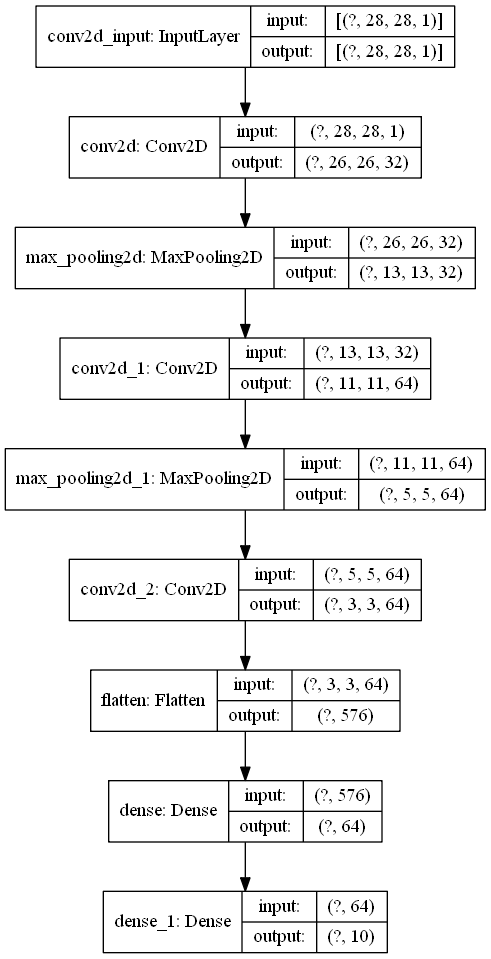

In [10]:
from keras.models import load_model
from keras.utils import plot_model


#输出模型，将结果保存到项目文件夹中
plot_model(model, to_file='model_2.png', show_shapes='True')
